<h2 style= "font-size:3rem;color:orange"> Feedback Delay Network</h2>


Algorithmic reverb using a 4x4 FDN

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display

Creating impuls to visualize impulse response of the algorithm

In [3]:
sr = 44100
x = np.zeros(sr) 
x[0] = 1
x[1] = 0.5

Initiazing matrix, delays and buffers

In [10]:
g = [[0,1,1,0],
     [-1,0,0,-1], 
     [1,0,0,-1], 
     [0,1,-1,0]]

delays = [1571, 2053, 2719, 3463];

buffers = [np.zeros(delays[0]), np.zeros(delays[1]), np.zeros(delays[2]), np.zeros(delays[3])]
feedbacks = [0,0,0,0]
delay_inputs = [0,0,0,0]
delay_outputs = [0,0,0,0]

y = np.zeros(len(x))

Delay line

In [11]:
def DelayLine(x, buffer, n, delay_length_samples, max_delay_length):    
    idxR = (n - delay_length_samples) %  max_delay_length # Read index
    y = buffer[idxR]
    idxW = n % max_delay_length # write index
    buffer[idxW] = x
    
    return y, buffer

Going through sample by sample

In [12]:
for n in range(0,len(x)):
    for i in range(0,4):
        delay_inputs[i] = x[n] + feedbacks[i]
        delay_outputs[i] , buffers[i] = DelayLine(delay_inputs[i], buffers[i], n,  delays[i], delays[i])
    
    for i in range(0,4):
        y[n] += delay_outputs[i]
        feedbacks[i] = 0.6 * (g[0][i] * delay_outputs[0]+ g[1][i] * delay_outputs[1] + g[2][i] * delay_outputs[2] + g[3][i] * delay_outputs[3])

Plot impulse response

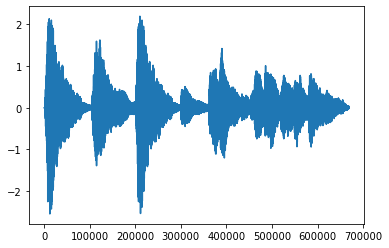

In [13]:
plt.plot(y)

Import audio and add reverb

In [14]:
x , sr = librosa.load('../samples/chords&notes.wav')

In [15]:
y = np.zeros(len(x))
for n in range(0,len(x)):
    for i in range(0,4):
        delay_inputs[i] = x[n] + feedbacks[i]
        delay_outputs[i] , buffers[i] = DelayLine(delay_inputs[i], buffers[i], n,  delays[i], delays[i])
    
    for i in range(0,4):
        y[n] += delay_outputs[i]
        feedbacks[i] = 0.6 * (g[0][i] * delay_outputs[0]+ g[1][i] * delay_outputs[1] + g[2][i] * delay_outputs[2] + g[3][i] * delay_outputs[3])

In [16]:
ipd.Audio(data = y, rate = sr)